In [29]:
import pandas as pd

data = pd.read_csv("../data/AAPL_data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1509 non-null   object 
 1   Open          1509 non-null   float64
 2   High          1509 non-null   float64
 3   Low           1509 non-null   float64
 4   Close         1509 non-null   float64
 5   Volume        1509 non-null   int64  
 6   Dividends     1509 non-null   float64
 7   Stock Splits  1509 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 94.4+ KB


In [30]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-02 00:00:00-05:00,36.985087,37.930669,36.827490,37.708599,148158800,0.0,0.0
1,2019-01-03 00:00:00-05:00,34.379969,34.795453,33.907180,33.952549,365248800,0.0,0.0
2,2019-01-04 00:00:00-05:00,34.511295,35.471204,34.336985,35.401955,234428400,0.0,0.0
3,2019-01-07 00:00:00-05:00,35.507022,35.538065,34.838429,35.323158,219111200,0.0,0.0
4,2019-01-08 00:00:00-05:00,35.712373,36.252024,35.464040,35.996525,164101200,0.0,0.0


In [31]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03,1509.000000,1509.000000
mean,135.071354,136.555958,133.714875,135.217730,9.420629e+07,0.003501,0.002651
std,54.121910,54.570982,53.708927,54.178990,5.233248e+07,0.027666,0.102971
min,34.379969,34.795453,33.907180,33.952549,2.323470e+07,0.000000,0.000000
25%,88.915255,90.247793,88.250234,88.876297,5.914450e+07,0.000000,0.000000
50%,143.439508,145.133791,141.887953,143.587448,8.153200e+07,0.000000,0.000000
75%,172.287775,173.921376,170.578985,172.447479,1.124244e+08,0.000000,0.000000
max,258.190002,260.100006,257.630005,259.019989,4.265100e+08,0.250000,4.000000


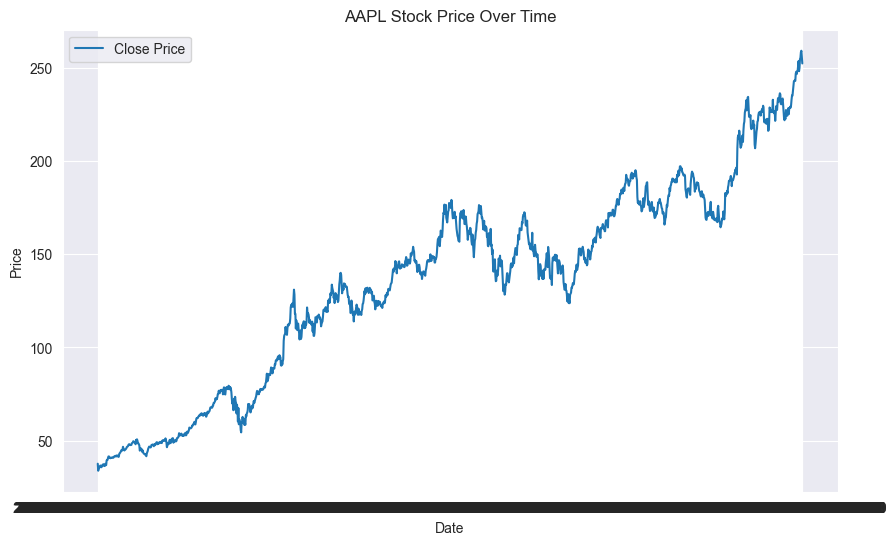

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Close'], label = 'Close Price')
plt.title("AAPL Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

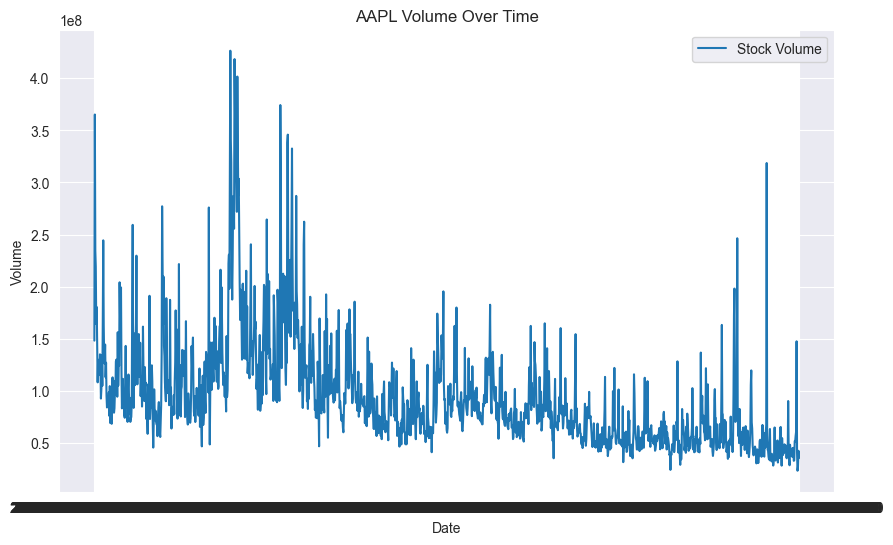

In [33]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Volume'], label = 'Stock Volume')
plt.title("AAPL Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

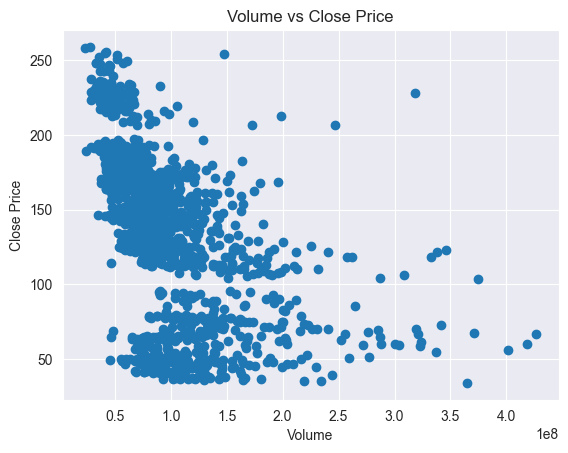

In [34]:
plt.scatter(data['Volume'], data['Close'])
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

In [35]:
corr_matrix = data.select_dtypes(include = 'number').corr()
corr_matrix

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999690,0.999686,0.999319,-0.531216,0.012036,-0.005013
High,0.999690,1.000000,0.999595,0.999686,-0.524615,0.011246,-0.004096
Low,0.999686,0.999595,1.000000,0.999685,-0.538207,0.012042,-0.005140
Close,0.999319,0.999686,0.999685,1.000000,-0.531786,0.011762,-0.004399
Volume,-0.531216,-0.524615,-0.538207,-0.531786,1.000000,-0.024073,0.064727
Dividends,0.012036,0.011246,0.012042,0.011762,-0.024073,1.000000,-0.003259
Stock Splits,-0.005013,-0.004096,-0.005140,-0.004399,0.064727,-0.003259,1.000000


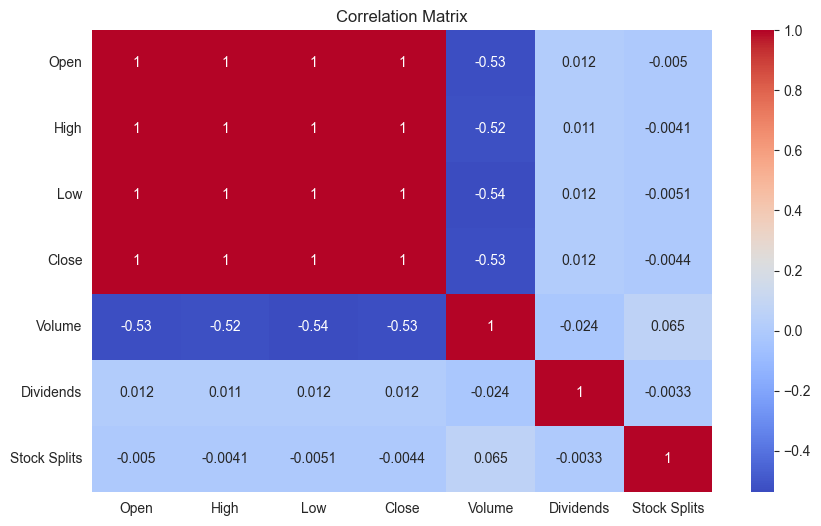

In [36]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

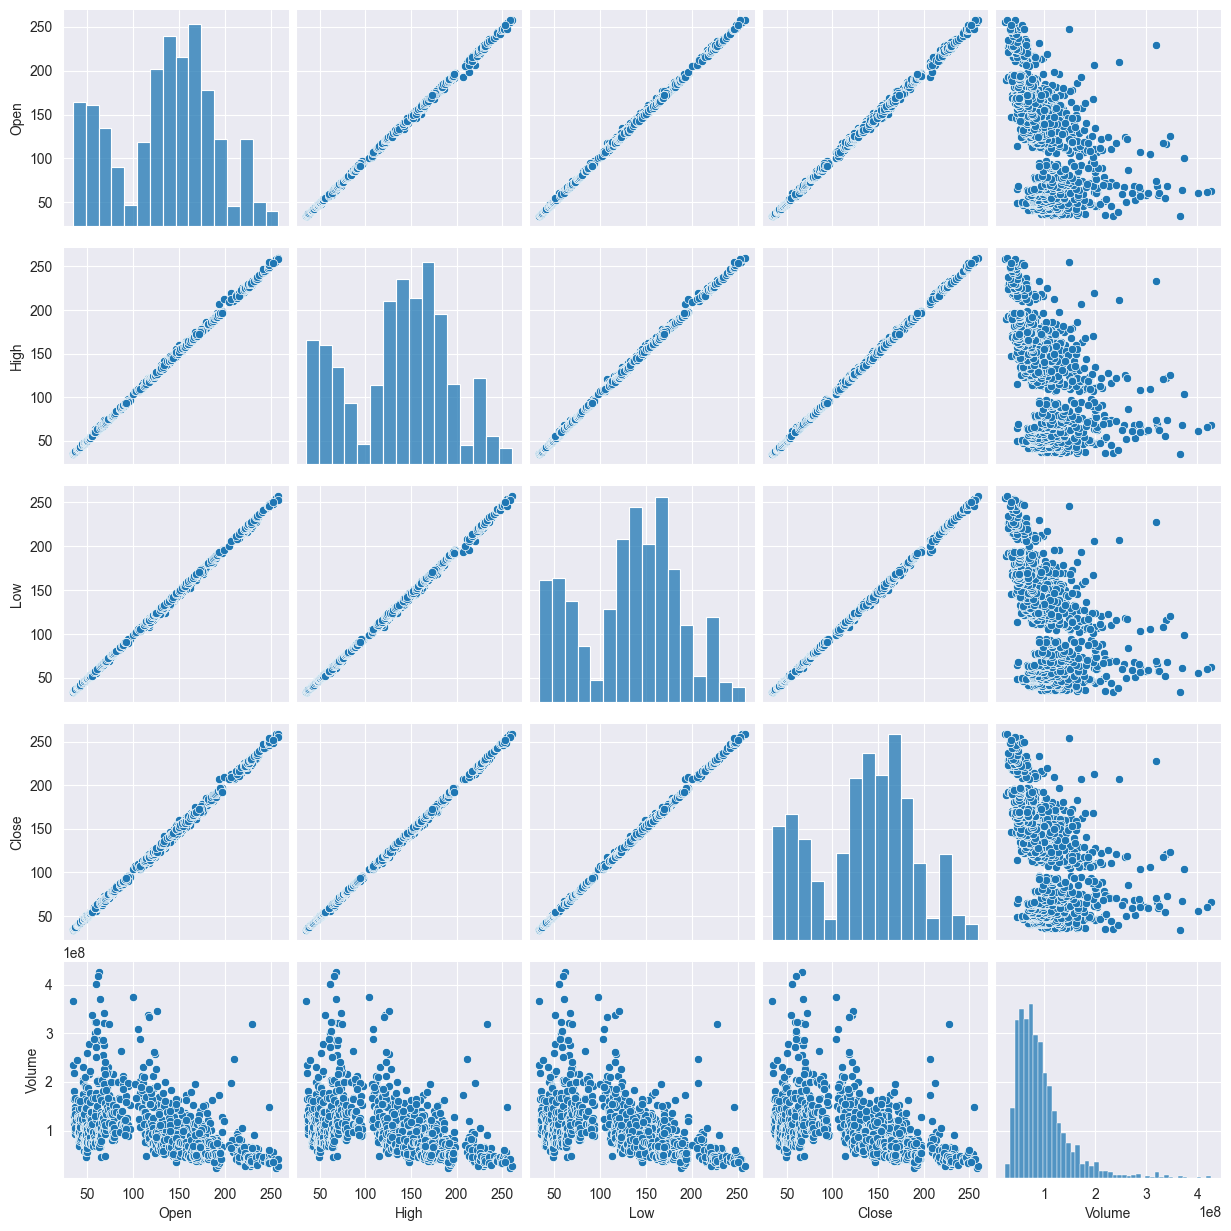

In [37]:
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume']])

<Axes: >

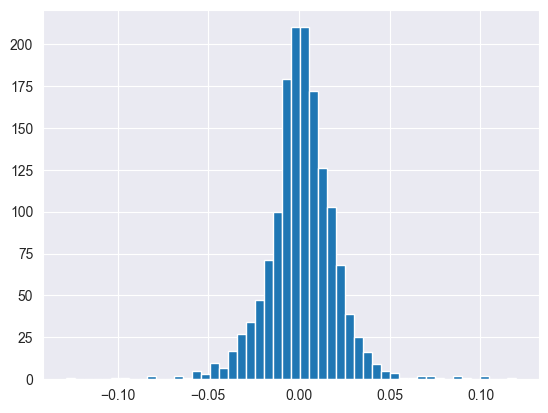

In [38]:
data['Daily_Return'] = data['Close'].pct_change()
data['Daily_Return'].hist(bins=50)

<Axes: >

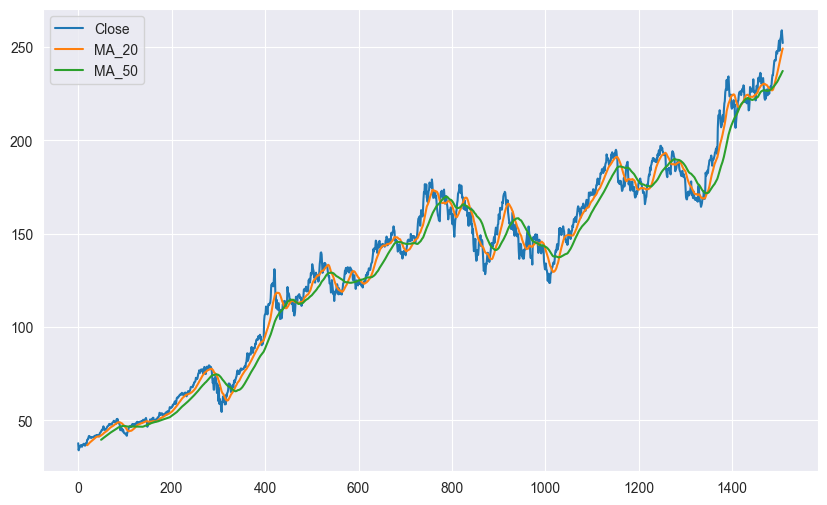

In [39]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

data[['Close', 'MA_20', 'MA_50']].plot(figsize=(10, 6))

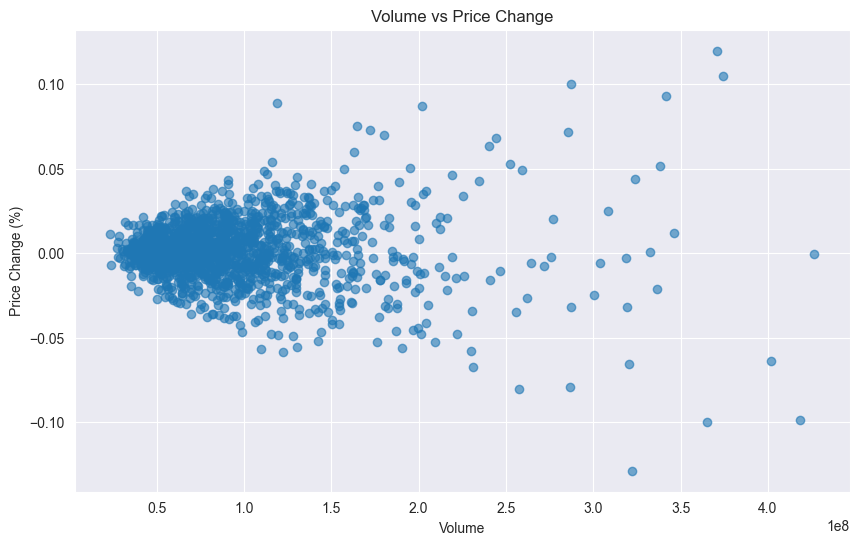

In [42]:
high_volume_days = data.sort_values(by='Volume', ascending=False).head(10)

data['Price_Change'] = data['Close'].pct_change()

#Scatter plot of Volume vs Price Change
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Price_Change'], alpha=0.6)
plt.title('Volume vs Price Change')
plt.xlabel('Volume')
plt.ylabel('Price Change (%)')
plt.show()

In [43]:
data['YearMonth'] = data['Date'].dt.to_period('M')  #Combines Year and Month
monthly_trends = data.groupby('YearMonth')['Close'].mean()

#Reset index to plot data
monthly_trends = monthly_trends.reset_index()
monthly_trends['YearMonth'] = monthly_trends['YearMonth'].dt.to_timestamp()

#Plot monthly trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_trends['YearMonth'], monthly_trends['Close'], marker='o')
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values